<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_13_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Studi Kasus 13 : Attrition Analysis**##

Studi kasus ini menunjukkan bagaimana **Attrition Analysis** membantu perusahaan
memahami masalah attrition karyawan secara mendalam dan merancang strategi berbasis data untuk meningkatkan retensi. Dengan menerapkan langkah-langkah yang
direkomendasikan, PT Kreativa Solusi dapat mencapai target bisnisnya dan membangun lingkungan kerja yang lebih positif.


## **Step 01 : Business Problem**##

Tingkat attrition karyawan yang tinggi mencapai 18%, melebihi rata-rata industri sebesar 12%. Masalah ini menyebabkan beberapa dampak negatif bagi perusahaan:

1. **Peningkatan Biaya Operasional**: Tingginya tingkat turnover memaksa perusahaan
terus merekrut dan melatih karyawan baru, yang membutuhkan waktu dan biaya
besar.
2. **Penurunan Produktivitas**: Kehilangan karyawan kunci memperlambat siklus
pengembangan produk dan menurunkan kualitas layanan.
3. **Kepuasan Pelanggan Menurun**: Divisi layanan pelanggan sering kekurangan staf,
menyebabkan keluhan pelanggan meningkat.
4. **Moral Karyawan Rendah**: Karyawan yang tersisa merasa terbebani dengan tugas tambahan akibat kurangnya tenaga kerja.

##**Step 02 : Analysis Objective**

1. Menurunkan tingkat attrition karyawan menjadi di bawah 10% dalam satu tahun.
2. Mengidentifikasi penyebab utama karyawan meninggalkan perusahaan.
3. Menyusun strategi berbasis data untuk meningkatkan retensi karyawan.
4. Meminimalkan dampak finansial dan operasional yang disebabkan oleh attrition.


##**Step 03 : Key Questions**

1. Divisi mana yang memiliki tingkat attrition tertinggi?
2. Apa penyebab utama karyawan meninggalkan perusahaan (contoh: gaji, lingkungan
kerja, atau manajemen)?
3. Apakah terdapat pola tertentu dalam data attrition (contoh: berdasarkan usia,
jabatan, atau lama bekerja)?
4. Faktor-faktor apa saja yang memengaruhi keputusan karyawan untuk tetap bekerja?

##**Step 04 : Data Findings**

In [53]:
import pandas as pd

file_path = "https://drive.google.com/uc?export=download&id=1kaH2B8bZbatbAVY9oct6yuotvTwtuGB2"
dataset = pd.read_csv(file_path)
dataset.head()

,EmployeeID,Division,Attrition,ReasonForLeaving,JobSatisfaction,CustomerComplaints,ProductivityScore,WorkloadScore,MoraleScore
0,1,Product Development,No,NaN,3,2,49.306580,31.869778,67.978312
1,2,Finance,No,NaN,1,3,83.439590,33.569764,71.872400
2,3,Sales,No,NaN,5,4,58.418092,48.691601,55.473647
3,4,Customer Service,No,NaN,3,0,46.194270,71.069100,61.723360
4,5,Product Development,No,NaN,2,2,70.014996,22.829266,68.022623


### **1. Divisi mana yang memiliki tingkat attrition tertinggi?**

In [54]:
# Fillter dataset to include only employees with attrition ("Yes")
attrition_df = dataset[dataset["Attrition"] == "Yes"]

In [55]:
# Calculate attrition rate for each division
division_attrition_rates = attrition_df["Division"].value_counts() / dataset["Division"].value_counts() * 100

In [56]:
# Sort by attrition rate in descending order
division_attrition_rates = division_attrition_rates.sort_values(ascending=False)

In [57]:
# Display
print(division_attrition_rates)

Division
Customer Service       19.931271
Product Development    19.239905
Finance                19.000000
Sales                  15.730337
HR                     14.141414
Name: count, dtype: float64


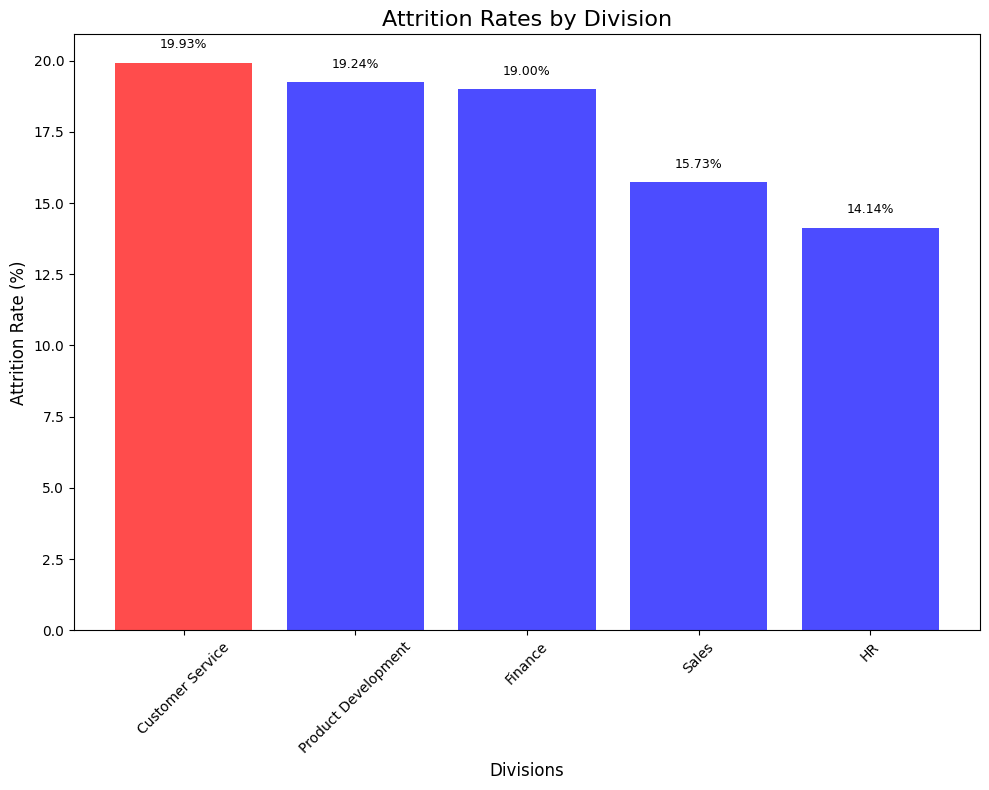

In [58]:
import matplotlib.pyplot as plt

# Plotting the attrition rates for each division
plt.figure(figsize=(10, 8))
bars = plt.bar(
    division_attrition_rates.index,
    division_attrition_rates.values,
    color=["Red" if division == division_attrition_rates.idxmax() else "Blue" for division in division_attrition_rates.index],
    alpha=0.7
)

# Adding labels and title
plt.xlabel("Divisions", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.title("Attrition Rates by Division", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding values on top of the bars
for bar in bars:
    plt.text(
    bar.get_x() + bar.get_width() / 2,  # Posisi x di tengah batang
    bar.get_height() + 0.5,             # Posisi y sedikit di atas batang
    f"{bar.get_height():.2f}%",         # Format teks (nilai dengan 2 desimal + '%')
    ha='center',                        # Teks disejajarkan ke tengah
    fontsize=9                          # Ukuran font 9
)

# Display
plt.tight_layout()
plt.show()


Divisi dengan tingkat attrition tertinggi adalah Customer Service, dengan tingkat attrition sebesar 19.93%.

In [59]:
# Filter attrition data for the division with the highest attrition
highest_attrition_division = division_attrition_rates.idxmax()
division_attrition_reasons = attrition_df[attrition_df["Division"] == highest_attrition_division]["ReasonForLeaving"]

In [60]:
# Count reasons for leaving and sort
reason_counts = division_attrition_reasons.value_counts().sort_values(ascending=False)

In [61]:
reason_counts.head()

,count
ReasonForLeaving,
Low Salary,18
Workload,17
Poor Management,12
Personal Reasons,6
Lack of Growth,5


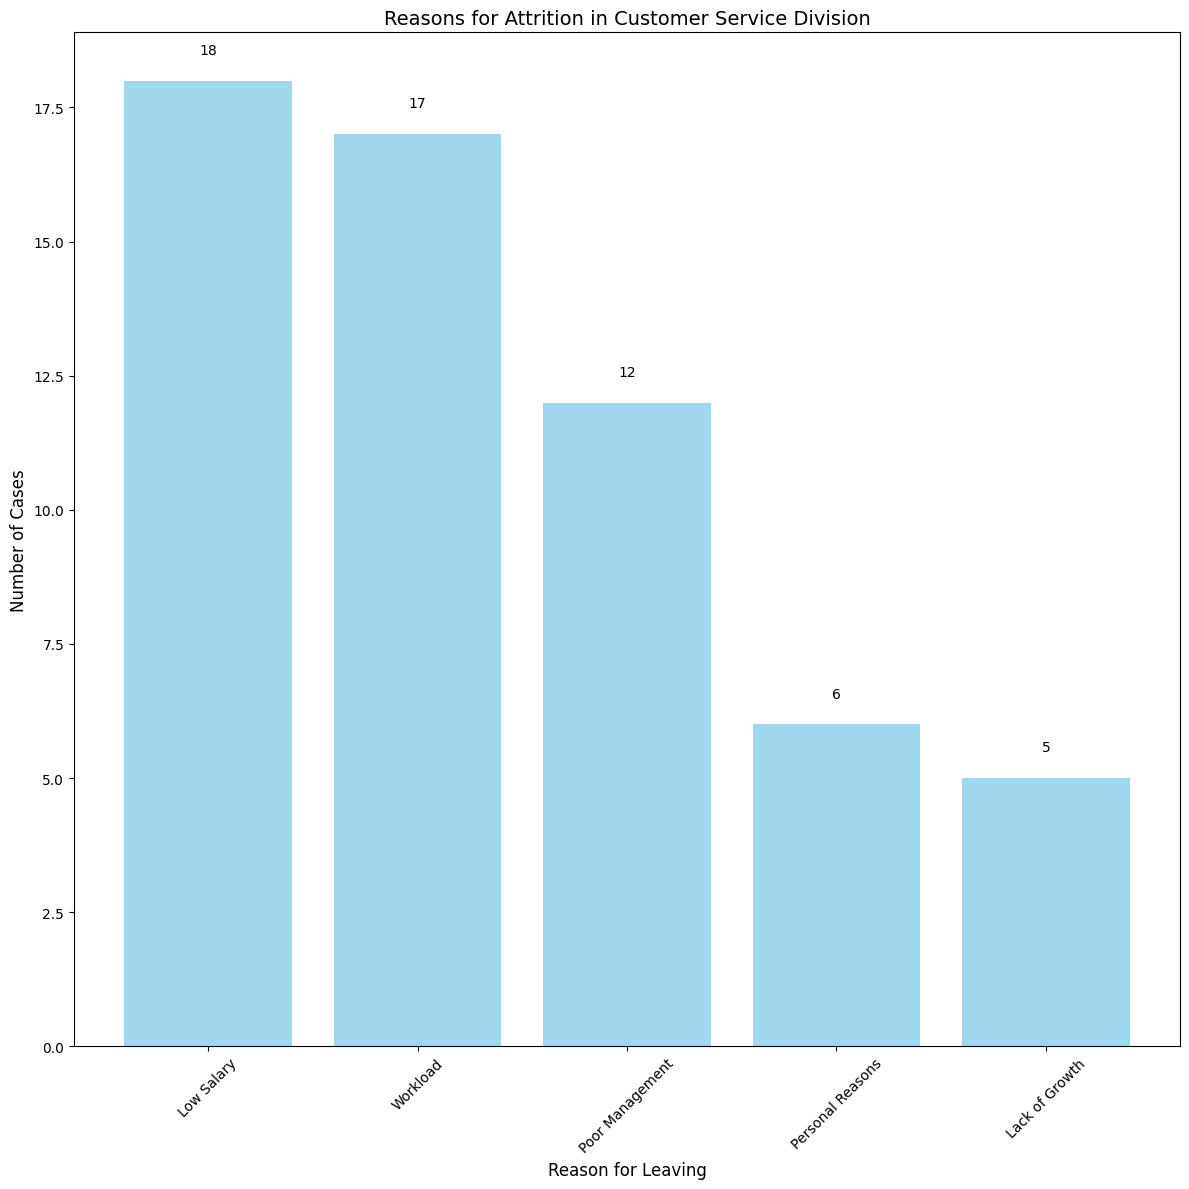

In [62]:
# Plotting the reasons for attrition in the division
plt.figure(figsize=(12, 12))
bars = plt.bar(
    reason_counts.index,
    reason_counts.values,
    color= "skyblue",
    alpha=0.8
)

# Adding labels and title
plt.title(f"Reasons for Attrition in {highest_attrition_division} Division", fontsize=14)
plt.xlabel("Reason for Leaving", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding values on top of the bars
for bar in bars:
    plt.text(
    bar.get_x() + bar.get_width() / 2,  # Posisi x di tengah batang
    bar.get_height() + 0.5,             # Posisi y sedikit di atas batang
    f"{bar.get_height()}",
    ha='center',                        # Teks disejajarkan ke tengah
    fontsize=10                          # Ukuran font 10
)

# Display
plt.tight_layout()
plt.show()


Berikut adalah visualisasi penyebab utama attrition di divisi Customer Service. Penyebab paling dominan adalah Low Salary, diikuti oleh Workload dan Poor Management.

###**2. Apa penyebab utama karyawan meninggalkan perusahaan?**

In [63]:
# Calculate overall reasons for leaving across all division
overall_reasons = dataset["ReasonForLeaving"].value_counts()

In [64]:
# Display
overall_reasons.head()

,count
ReasonForLeaving,
Workload,60
Low Salary,50
Poor Management,44
Lack of Growth,21
Personal Reasons,11


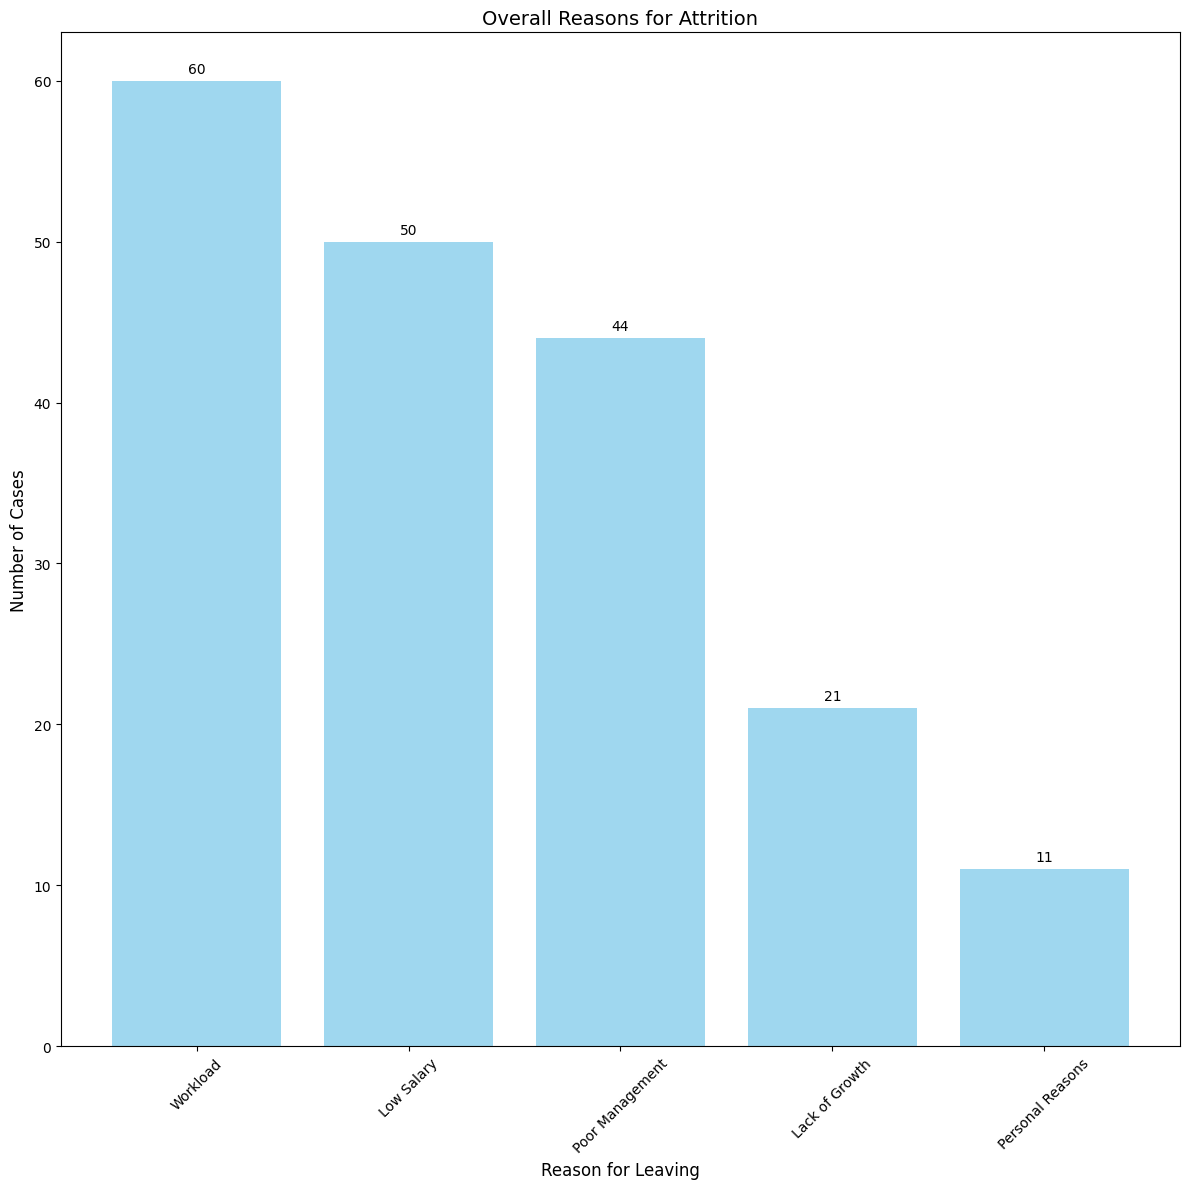

In [65]:
# Plotting the overall reasons for attrition
plt.figure(figsize=(12, 12))
bars = plt.bar(
    overall_reasons.index,
    overall_reasons.values,
    color= "skyblue",
    alpha=0.8
)

# Adding labels and title
plt.title("Overall Reasons for Attrition", fontsize=14)
plt.xlabel("Reason for Leaving", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding values on top of the bars
for bar in bars:
    plt.text(
    bar.get_x() + bar.get_width() / 2,  # Posisi x di tengah batang
    bar.get_height() + 0.5,             # Posisi y sedikit di atas batang
    f"{bar.get_height()}",
    ha='center',                        # Teks disejajarkan ke tengah
    fontsize=10                         # Ukuran font 10
)

# Display
plt.tight_layout()
plt.show()

Penyebab paling dominan adalah Workload, diikuti oleh Low Salary dan Poor Management.

### **3. Apakah terdapat pola tertentu dalam data attrition (contoh: berdasarkan usia, jabatan, atau lama bekerja)?**

In [66]:
import seaborn as sns

In [67]:
data_copy = dataset.copy()

In [68]:
# Encode 'Attrition' as binary (Yes=1, No=0) for analysis
data_copy["Attrition"] = data_copy["Attrition"].map({"Yes": 1, "No": 0})

In [69]:
# Convert 'Attrition' to categorical with custom labels
data_copy["Attrition"] = pd.Categorical(data_copy["Attrition"], categories=[0, 1], ordered=True)
data_copy["Attrition"] = data_copy["Attrition"].cat.rename_categories({0: "No", 1: "Yes"})

<ipython-input-76-57fbbe9a8993>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
<ipython-input-76-57fbbe9a8993>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
<ipython-input-76-57fbbe9a8993>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
<ipython-input-76-57fbbe9a8993>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)


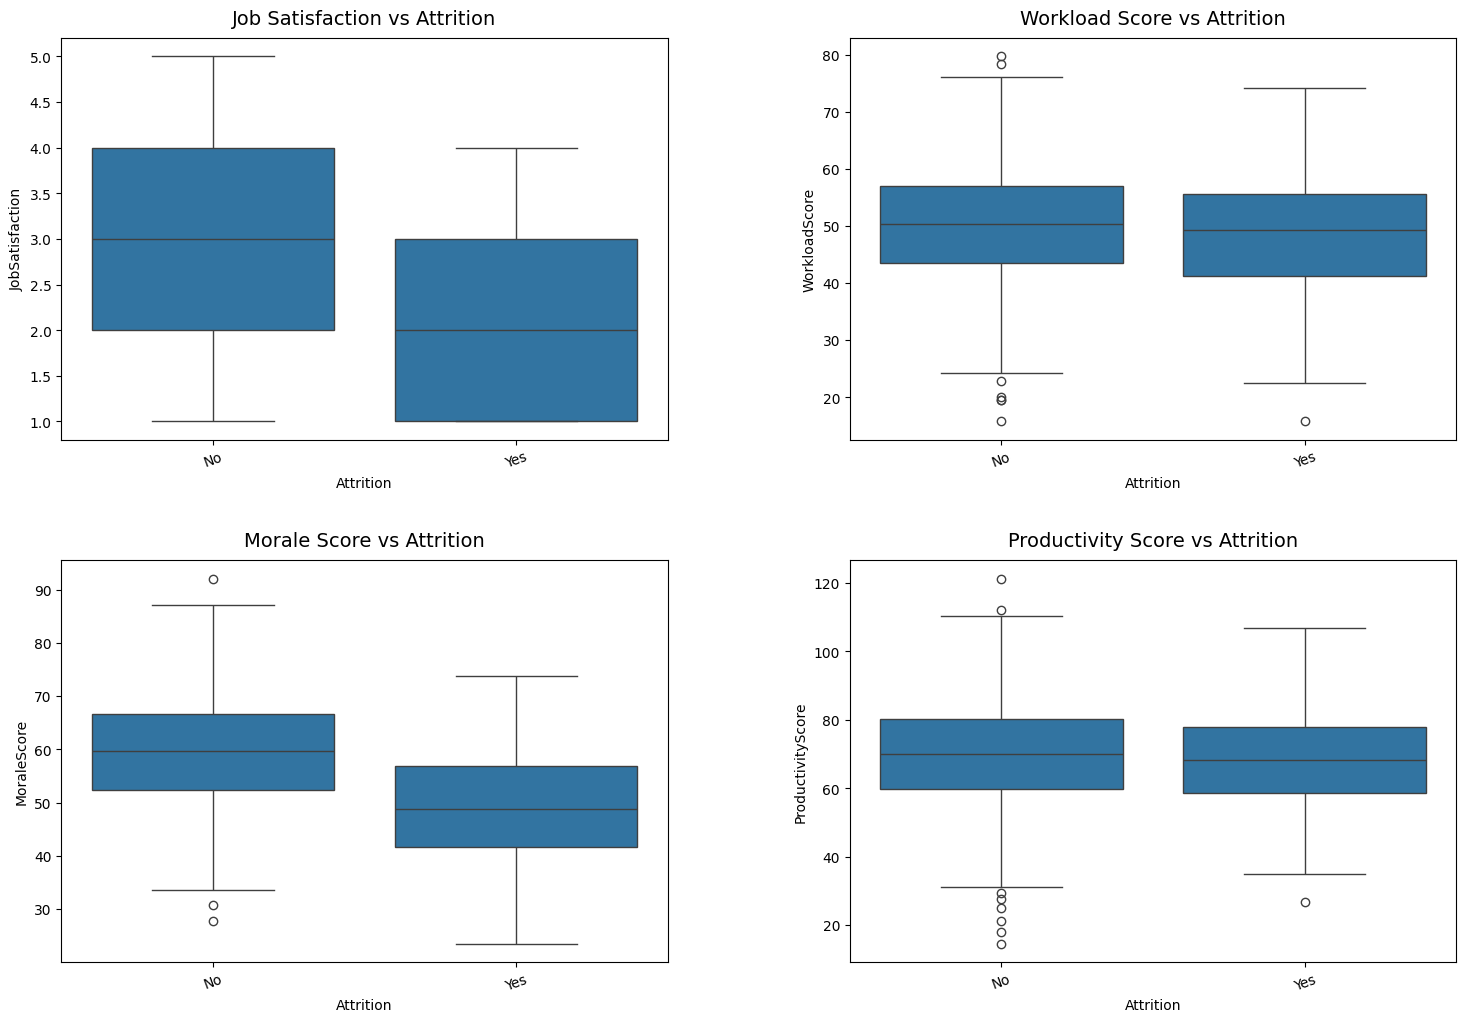

In [76]:
# Plotting relationships between Attrition and numerical factors
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Tambah jarak antar subplot
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Job Satisfaction vs Attrition
sns.boxplot(x="Attrition", y="JobSatisfaction", data=data_copy, ax=axes[0, 0])
axes[0, 0].set_title("Job Satisfaction vs Attrition", fontsize=14, pad=10)

# Workload Score vs Attrition
sns.boxplot(x="Attrition", y="WorkloadScore", data=data_copy, ax=axes[0, 1])
axes[0, 1].set_title("Workload Score vs Attrition", fontsize=14, pad=10)

# Morale Score vs Attrition
sns.boxplot(x="Attrition", y="MoraleScore", data=data_copy, ax=axes[1, 0])
axes[1, 0].set_title("Morale Score vs Attrition", fontsize=14, pad=10)

# Plot 5: Productivity Score vs Attrition
sns.boxplot(x="Attrition", y="ProductivityScore", data=data_copy, ax=axes[1, 1])
axes[1, 1].set_title("Productivity Score vs Attrition", fontsize=14, pad=10)

# Rotasi label x agar tidak bertumpuk
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

# Tampilkan plot
plt.show()

Berdasarkan visualisasi hubungan antara status attrition dan beberapa faktor:
1. Job Satisfaction: Karyawan yang meninggalkan perusahaan cenderung memiliki kepuasan kerja lebih rendah.
2. Workload Score: Beban kerja cenderung lebih tinggi pada karyawan yang mengalami attrition.
3. Morale Score: Moral karyawan yang meninggalkan perusahaan tampak lebih rendah dibandingkan dengan mereka yang tetap bekerja.
4. Productivity Score: Tidak ada perbedaan mencolok, tetapi karyawan yang tetap bekerja sedikit lebih produktif.

Pola ini menunjukkan bahwa faktor-faktor seperti kepuasan kerja, beban kerja, dan morale berperan penting dalam attrition. Morale dalam kasus ini dapat diartikan sebagai tingkat semangat kerja, motivasi, dan kepuasan emosional seorang karyawan terhadap pekerjaan mereka dan lingkungan kerja secara keseluruhan.

### **4. Seberapa besar Kenaikan Biaya Rekrutmen dan Pelatihan?**

Asumsikan
1. Biaya rekrutmen per karyawan: Rp200.000.
2. Biaya pelatihan per karyawan: Rp1.000.000.
3. Jumlah karyawan yang mengalami attrition: 2 karyawan per bulan.


In [77]:
# Assumptions
recruitment_cost_per_employee = 200000  # IDR
training_cost_per_employee = 1000000  # IDR
attrition_per_month = 2  # employees

# Calculate monthly and annual costs
monthly_cost = attrition_per_month * (recruitment_cost_per_employee + training_cost_per_employee)
annual_cost = monthly_cost * 12

monthly_cost, annual_cost

(2400000, 28800000)

Maka kenaikan biaya adalah:
* Per bulan: Rp2.400.000.
* Per tahun: Rp28.800.000

##**Step 05: Business Implication**

**Strategic Implications**

- Daya Saing Perusahaan: Tingkat attrition yang tinggi menurunkan kapasitas perusahaan dalam menghadirkan produk berkualitas tepat waktu.
- Reputasi Perusahaan: Tingkat attrition yang tinggi dapat memengaruhi
reputasi perusahaan di pasar tenaga kerja.

**Operational Implications**

- Produktivitas Menurun: Kehilangan karyawan kunci memperlambat proyek
dan meningkatkan beban kerja tim yang tersisa.
- Efisiensi Proses Berkurang: Tingginya pergantian staf menyebabkan waktu
pelatihan meningkat, memperlambat integrasi tim baru.



**Financial Implications**

- Biaya Operasional Tinggi: Rekrutmen dan pelatihan karyawan baru
memakan biaya yang dapat dialokasikan untuk investasi lain.
- Kerugian Tidak Langsung: Penurunan produktivitas dan kepuasan pelanggan berdampak pada profitabilitas jangka panjang.

##**Step 06 : Recommendations**

**1. Tahap Manajemen Beban Kerja:**
    
  - Lakukan **redistribusi beban kerja** untuk mengurangi tekanan pada divisi
dengan skor beban kerja tinggi.
  - Implementasikan **tools otomatisasi** untuk mengurangi pekerjaan manual di
divisi dengan attrition tinggi.


**2. Tahap Pengelolaan Karyawan:**

- **Peningkatan Kompensasi**: Sesuaikan gaji dengan rata-rata industri untuk
menarik dan mempertahankan talenta.
- **Pelatihan Kepemimpinan**: Tingkatkan kemampuan manajerial untuk
mencegah isu manajemen buruk.


**3. Tahap Lingkungan Kerja:**

- Tingkatkan moral kerja melalui **program penghargaan** dan **aktivitas team building**.
- Ciptakan jalur karier yang jelas untuk meningkatkan motivasi karyawan.


**4. Tahap Analisis dan Monitoring:**

- **Analisis Data Berkelanjutan**: Pantau skor beban kerja, kepuasan kerja, dan
moral secara berkala.
- Lakukan survei untuk mendapatkan umpan balik langsung dari karyawan.